In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, matthews_corrcoef,cohen_kappa_score,roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler


For Google Colab, the drive has to be mounted and the datasets have to be stored in the Drive. If executing this locally, do not run this code and use the conventional Pandas reading of csv files, which has to be uncommented.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# xtrain=pd.read_csv("../data/X_train.csv")
# xtest=pd.read_csv("../data/X_test.csv")
# ytrain=pd.read_csv("../data/y_train.csv")
# ytest=pd.read_csv("../data/y_test.csv")

xtrain=pd.read_csv('/content/gdrive/My Drive/data for phishing project/X_train.csv')
xtest=pd.read_csv('/content/gdrive/My Drive/data for phishing project/X_test.csv')
ytrain=pd.read_csv('/content/gdrive/My Drive/data for phishing project/y_train.csv')
ytest=pd.read_csv('/content/gdrive/My Drive/data for phishing project/y_test.csv')

In [4]:
print(f"{xtrain.shape,xtest.shape,ytrain.shape,ytest.shape}")

((3645, 24), (405, 24), (3645, 1), (405, 1))


Scaling of features

In [5]:
# getting scaled features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

The code in the below cell was used to get the earlier ann results. These results were used to understand that epochs of 250 and 512 neurons gave the best result. Hence, we kept the epochs as 250 and changed other parameters.

In [ ]:
# took about 25 minutes to run on Colab. Locally, could be take more time.
# ann_models.csv file has this data.

eps = [75,100,125,150,175,200,225,250]
neurons = [32,64,128,256,512]
metdict = {}


def metrics(eps,neu,ytest,ypred):
  return accuracy_score(ytest,ypred), f1_score(ytest,ypred), recall_score(ytest,ypred), precision_score(ytest,ypred), matthews_corrcoef(ytest,ypred), cohen_kappa_score(ytest,ypred)
  

for i in range(len(eps)):
  for j in range(len(neurons)):
    print(f'for {eps[i]}, {neurons[j]}, the results are: ')
    model = Sequential()
    model.add(Dense(neurons[j], activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd',loss="binary_crossentropy",metrics=['accuracy'])
    model.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = eps[i],verbose=0)
    y_pred = model.predict(X_test_scaled)
    ypred=[]
    for k in y_pred:
      if k>0.5:
        ypred.append(1)
      else:
        ypred.append(0)

    ypred=np.asarray(ypred)
    acc,f1,rec,pre,mcc,coh = metrics(eps[i],neurons[j],ytest,ypred)
    val = [acc,f1,rec,pre,mcc,coh]
    metdict[f'for {eps[i]}, {neurons[j]}, the results are: '] = val
    print(val)
    


for 75, 32, the results are: 
13/13 [==============================] - 0s 2ms/step
[0.7925925925925926, 0.7324840764331211, 0.6845238095238095, 0.7876712328767124, 0.5681910365940473, 0.5644826791612259]
for 75, 64, the results are: 
13/13 [==============================] - 0s 2ms/step
[0.7901234567901234, 0.7335423197492164, 0.6964285714285714, 0.7748344370860927, 0.5634092807207493, 0.5612358046877988]
for 75, 128, the results are: 
13/13 [==============================] - 0s 3ms/step
[0.7975308641975308, 0.74375, 0.7083333333333334, 0.7828947368421053, 0.5790684067154194, 0.5770935207823962]
for 75, 256, the results are: 
13/13 [==============================] - 0s 2ms/step
[0.7975308641975308, 0.7371794871794871, 0.6845238095238095, 0.7986111111111112, 0.5786127257880254, 0.5740997229916898]
for 75, 512, the results are: 
13/13 [==============================] - 0s 2ms/step
[0.8, 0.7428571428571428, 0.6964285714285714, 0.7959183673469388, 0.583872500182276, 0.5804075054679406]
for 

Saving those results

In [ ]:
w = csv.writer(open("ann_models.csv", "w"))
for key, val in metdict.items():
    w.writerow([key, val])

The below code has 6 different models. The first one is just a simple perceptron, and the rest have 1 hidden layer with different number of total neurons. 
It was discovered that no matter what the number of neurons are there, the model will converge only upto certain point. This is proved in the visualizations later on. Even having a single perceptron, i.e. no hidden layer, the model gave good results. In fact, the training and validation accuracies were converging in this case only. When we add a hidden layer with some neurons, the model would diverge after reaching a certain point. That point is where, no sufficient increase in recall and accuracy is achieved.

In [6]:
# ann_results.csv has the metrics of these models.

tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(1, activation='sigmoid'))

model1 = Sequential()
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model2 = Sequential()
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model3 = Sequential()
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model4 = Sequential()
model4.add(Dense(256, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model5 = Sequential()
model5.add(Dense(512, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model6 = Sequential()
model6.add(Dense(1024, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

model7 = Sequential()
model7.add(Dense(256, activation='relu'))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

model8 = Sequential()
model8.add(Dense(512, activation='relu'))
model8.add(Dense(512, activation='relu'))
model8.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=[tf.keras.metrics.Recall(),'accuracy'])
model1.compile(optimizer="sgd",loss="binary_crossentropy",metrics=[tf.keras.metrics.Recall(),'accuracy'])
model2.compile(optimizer="sgd",loss="binary_crossentropy",metrics=[tf.keras.metrics.Recall(),'accuracy'])
model3.compile(optimizer="sgd",loss="binary_crossentropy",metrics=[tf.keras.metrics.Recall(),'accuracy'])
model4.compile(optimizer="sgd",loss="binary_crossentropy",metrics=[tf.keras.metrics.Recall(),'accuracy'])
model5.compile(optimizer="sgd",loss="binary_crossentropy",metrics=[tf.keras.metrics.Recall(),'accuracy'])
model6.compile(optimizer="sgd",loss="binary_crossentropy",metrics=[tf.keras.metrics.Recall(),'accuracy'])
model7.compile(optimizer="sgd",loss="binary_crossentropy",metrics=[tf.keras.metrics.Recall(),'accuracy'])
model8.compile(optimizer="sgd",loss="binary_crossentropy",metrics=[tf.keras.metrics.Recall(),'accuracy'])


In [8]:
history = model.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = 250, verbose = 1)
history1 = model1.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = 250, verbose = 1)
history2 = model2.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = 250, verbose = 1)
history3 = model3.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = 250, verbose = 1)
history4 = model4.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = 250, verbose = 1)
history5 = model5.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = 250, verbose = 1)
history6 = model6.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = 250, verbose = 1)
history7 = model7.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = 250, verbose = 1)
history8 = model8.fit(X_train_scaled, ytrain, validation_split=0.25, epochs = 250, verbose = 1)

Epoch 1/250
86/86 [==============================] - 1s 6ms/step - loss: 0.7111 - recall: 0.5598 - accuracy: 0.5968 - val_loss: 0.7293 - val_recall: 0.5646 - val_accuracy: 0.6195
Epoch 2/250
86/86 [==============================] - 0s 3ms/step - loss: 0.6684 - recall: 0.5749 - accuracy: 0.6264 - val_loss: 0.6885 - val_recall: 0.5699 - val_accuracy: 0.6436
Epoch 3/250
86/86 [==============================] - 0s 3ms/step - loss: 0.6373 - recall: 0.6019 - accuracy: 0.6593 - val_loss: 0.6591 - val_recall: 0.5858 - val_accuracy: 0.6678
Epoch 4/250
86/86 [==============================] - 0s 2ms/step - loss: 0.6145 - recall: 0.6019 - accuracy: 0.6733 - val_loss: 0.6364 - val_recall: 0.5805 - val_accuracy: 0.6787
Epoch 5/250
86/86 [==============================] - 0s 2ms/step - loss: 0.5969 - recall: 0.6086 - accuracy: 0.6919 - val_loss: 0.6185 - val_recall: 0.5831 - val_accuracy: 0.6809
Epoch 6/250
86/86 [==============================] - 0s 2ms/step - loss: 0.5827 - recall: 0.6069 - accura

Plotting of the trained models.

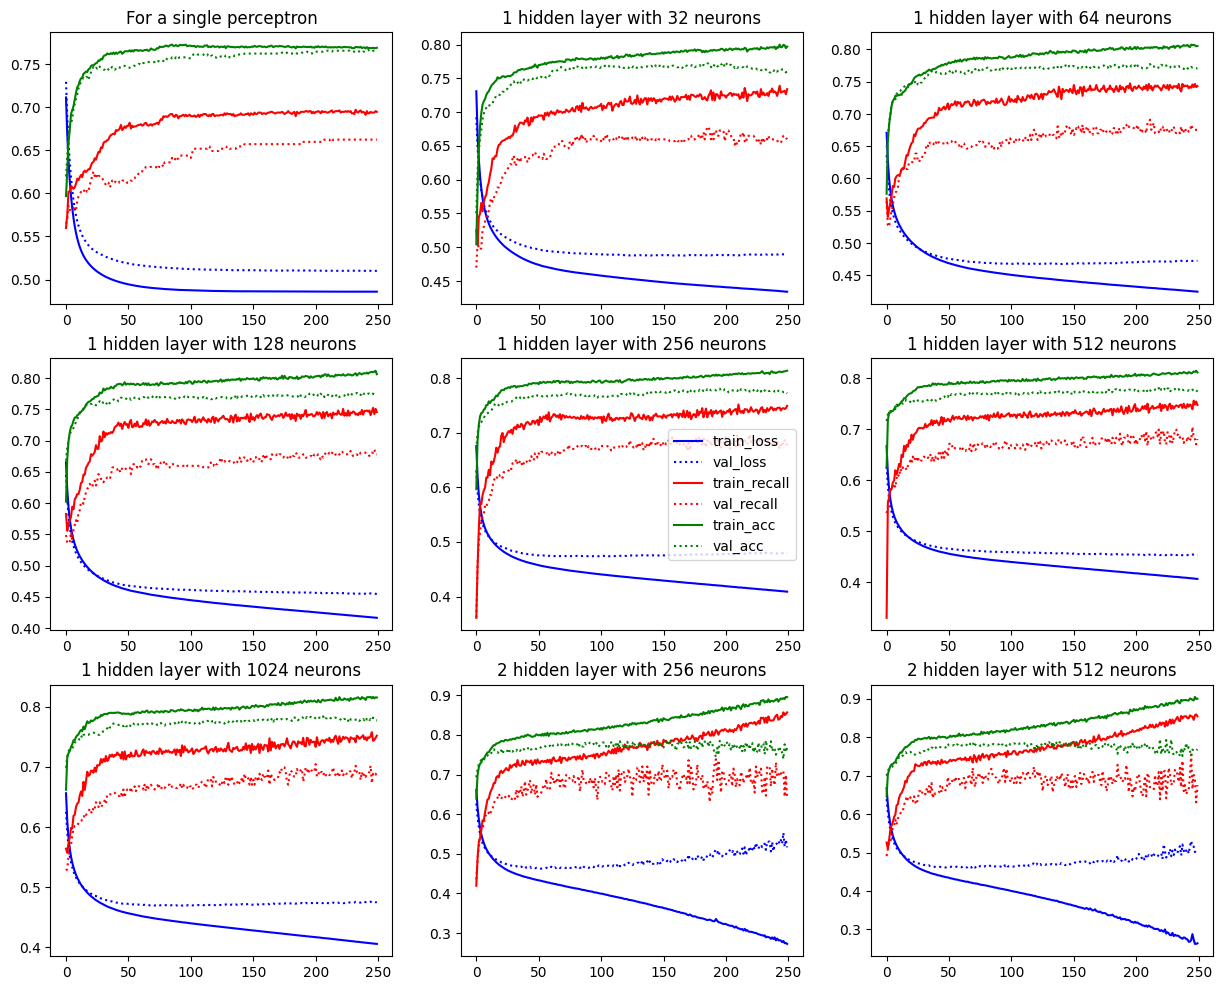

In [9]:
histories = [history,history1,history2,history3,history4,history5,history6,history7,history8]
tr_recalls = ['recall','recall_1','recall_2','recall_3','recall_4','recall_5','recall_6','recall_7','recall_8']
val_recalls = ['val_recall','val_recall_1','val_recall_2','val_recall_3','val_recall_4','val_recall_5','val_recall_6','val_recall_7','val_recall_8']
titles = ['For a single perceptron','1 hidden layer with 32 neurons','1 hidden layer with 64 neurons','1 hidden layer with 128 neurons',
          '1 hidden layer with 256 neurons','1 hidden layer with 512 neurons','1 hidden layer with 1024 neurons',
          '2 hidden layer with 256 neurons','2 hidden layer with 512 neurons']

f, ax = plt.subplots(3, 3, figsize=(15, 12))
c=0
for i in range(0,3):
  for j in range(0,3):
    ax[i,j].plot(histories[c].history['loss'], color = 'blue')
    ax[i,j].plot(histories[c].history['val_loss'], color = 'blue', linestyle='dotted')
    ax[i,j].plot(histories[c].history[tr_recalls[c]], color = 'red')
    ax[i,j].plot(histories[c].history[val_recalls[c]], color = 'red', linestyle='dotted')
    ax[i,j].plot(histories[c].history['accuracy'], color = 'green')
    ax[i,j].plot(histories[c].history['val_accuracy'], color = 'green', linestyle='dotted')
    ax[i,j].set_title(titles[c])
    c = c+1

ax[1,1].legend(['train_loss', 'val_loss', 'train_recall', 'val_recall', 'train_acc', 'val_acc'], loc='center right')


ROC Curves of all the models and the prediction on test set

13/13 [==============================] - 0s 3ms/step


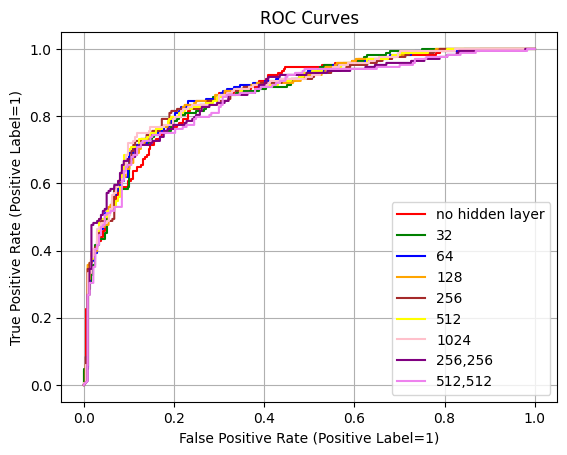

[0.4080242, 0.49408528, 0.38319653, 0.36798579, 0.37471336, 0.39162394, 0.45591804, 0.41903993, 0.47233665]
{'no hidden layer': [0.7876543209876543, 0.7624309392265194, 0.8214285714285714, 0.711340206185567, 0.5770955619368824, 0.5722496499889471], '32': [0.8098765432098766, 0.7570977917981073, 0.7142857142857143, 0.8053691275167785, 0.6047568534968433, 0.6018309265714177], '64': [0.8, 0.773109243697479, 0.8214285714285714, 0.7301587301587301, 0.5987074901356342, 0.5954045954045954], '128': [0.7975308641975308, 0.7722222222222224, 0.8273809523809523, 0.7239583333333334, 0.5957268402588541, 0.5914526129317981], '256': [0.8074074074074075, 0.7771428571428571, 0.8095238095238095, 0.7472527472527473, 0.6095650304362573, 0.6080547904414502], '512': [0.8, 0.7665706051873198, 0.7916666666666666, 0.7430167597765364, 0.5928429445363694, 0.5919319326790312], '1024': [0.8246913580246914, 0.778816199376947, 0.7440476190476191, 0.8169934640522876, 0.6360491338060575, 0.6341463414634146], '256,256':

In [10]:
def metrics(ytest,ypred):
  return accuracy_score(ytest,ypred), f1_score(ytest,ypred), recall_score(ytest,ypred), precision_score(ytest,ypred), matthews_corrcoef(ytest,ypred), cohen_kappa_score(ytest,ypred)


neurons = ['no hidden layer','32','64','128','256','512','1024','256,256','512,512']
metdict = {}
ms = [model,model1,model2,model3,model4,model5,model6,model7,model8]
cols = ['red','green','blue','orange','brown','yellow','pink','purple','violet']
gs = []
n=0
for m,c in zip(ms,cols):
  y_pred = m.predict(X_test_scaled)
  fprs,tprs,threshs = roc_curve(ytest,y_pred)
  plt.plot(fprs, tprs, color=c)
  gmeans = np.sqrt(tprs * (1-fprs))
  ix = np.argmax(gmeans)
  gs.append(threshs[ix])
  ypred = []
  for k in y_pred:
    # to 0.5 since we want to weight in the recall over precision
    if k>threshs[ix]:
      ypred.append(1)
    else:
      ypred.append(0)
  ypred=np.asarray(ypred)
  acc,f1,rec,pre,mcc,coh = metrics(ytest,ypred)
  val = [acc,f1,rec,pre,mcc,coh]
  metdict[f'{neurons[n]}'] = val
  n = n + 1

plt.legend(['no hidden layer','32','64','128','256','512','1024','256,256','512,512'])
plt.grid()
plt.title('ROC Curves')
plt.xlabel('False Positive Rate (Positive Label=1)')
plt.ylabel('True Positive Rate (Positive Label=1)')
plt.show()
print(gs)
print(metdict)

In [12]:
import csv
w = csv.writer(open("ann_results.csv", "w"))
for key, val in metdict.items():
    w.writerow([key, val])